In [209]:
import pandas as pd
import numpy as np

In [210]:
index50 = pd.read_csv('台灣50指數資料.csv', encoding='utf-16', sep='\t')

In [211]:
#計算市值與權重並新增欄位
index50['市值'] = index50['公眾流通係數'] * index50['前日調整收盤價']*index50['股數']
index50['成份股'] = index50['成份股'].str.split(' ').str[0]
index50

,證券代碼,年月日,成份股,指數因子,公眾流通係數,股數,前日調整收盤價,前日市值比重,市值
0,TWN50 台灣50指數,20190102,1101,0.0021,0.8700,5108059911,35.60,1.0261,1.582068e+11
1,TWN50 台灣50指數,20190102,1102,0.0011,0.6900,3361447198,33.95,0.5107,7.874358e+10
2,TWN50 台灣50指數,20190102,1216,0.0023,0.8500,5682015421,69.80,2.1865,3.371140e+11
3,TWN50 台灣50指數,20190102,1301,0.0023,0.7700,6365740781,101.00,3.2110,4.950637e+11
4,TWN50 台灣50指數,20190102,1303,0.0027,0.7200,7930821589,75.50,2.7962,4.311195e+11
...,...,...,...,...,...,...,...,...,...
48896,TWN50 台灣50指數,20221230,5880,0.0044,0.7200,14008935446,25.65,1.0845,2.587170e+11
48897,TWN50 台灣50指數,20221230,6415,0.0001,0.6600,381075821,432.50,0.4560,1.087781e+11
48898,TWN50 台灣50指數,20221230,6505,0.0006,0.1500,9525959652,79.70,0.4774,1.138828e+11
48899,TWN50 台灣50指數,20221230,8046,0.0001,0.3249,646165487,231.00,0.2033,4.849595e+10


In [213]:
#將dataframe依照年月日切割，存入dict, ex. data_dict['2019/01/02']可取出當天的資料
data_of_the_date = {}
for i in range(0, len(index50)):
    if index50['年月日'][i] not in data_of_the_date:
        data_of_the_date[index50['年月日'][i]] = index50.iloc[i:i+1]
    else:
        data_of_the_date[index50['年月日'][i]] = pd.concat([data_of_the_date[index50['年月日'][i]], index50.iloc[i:i+1]])

In [214]:
# # 範例
# data_of_the_date[20190102]

In [215]:
#算權重
def get_weight(daily_data):
    stock_and_weight = {}
    total_value = daily_data['市值'].sum()
    for i in range(len(daily_data)):
        stock_and_weight[daily_data['成份股'][i]] = daily_data['市值'][i]/total_value
    return stock_and_weight

# # 使用範例
# get_weight(data_of_the_date[20190102])

In [216]:
import datetime as dt
import calendar

def find_last_weekday(year):
    months = [2, 5, 8, 11]
    last_days = []
    for month in months:
        num_days = calendar.monthrange(year, month)[1]

        # 取得當月最後一天的日期
        last_day = dt.date(year, month, num_days)

        # 若最後一天是週末，往前推算直到非週末
        while last_day.weekday() >= 5:  # 5 和 6 分別代表週六和週日
            last_day -= dt.timedelta(days=1)
        last_days.append(str(last_day).replace('-', ''))

    return last_days

# 使用範例
year = 2023
find_last_weekday(year)


['20230228', '20230531', '20230831', '20231130']

In [217]:
#讀入台灣50成分股每日報酬率
stocks_daily_return = pd.read_csv('台灣50各成分股日報酬.csv')
stocks_daily_return['成份股'] = (stocks_daily_return['代號'].astype(str) + ' ' + stocks_daily_return['名稱']).str.split(' ').str[0]
stocks_daily_return['年月日'] = stocks_daily_return['年月日'].astype(str).str.replace('/', '').astype(int)
stocks_daily_return

,代號,名稱,年月日,報酬率％,成份股
0,1101,台泥,20221230,-0.1484,1101
1,1101,台泥,20221229,-1.7493,1101
2,1101,台泥,20221228,0.0000,1101
3,1101,台泥,20221227,-0.2907,1101
4,1101,台泥,20221226,1.0279,1101
...,...,...,...,...,...
48794,9910,豐泰,20190108,0.0000,9910
48795,9910,豐泰,20190107,1.8088,9910
48796,9910,豐泰,20190104,1.5748,9910
48797,9910,豐泰,20190103,1.6000,9910


In [218]:
import pandas as pd

# 創建 DataFrame
data = {
    '代號': [1101, 1102],
    '名稱': ['台泥', '台泥'],
    '年月日': ['2022/12/29', '2022/12/29'],
    '報酬率％': [-0.1484, -1.7493],
    '成份股': ['1101 台泥', '1101 台泥']
}
df = pd.DataFrame(data)

# 擷取特定日期的數據
target_date = '2022/12/29'
m1 = df['年月日'] == target_date
m2 = df['代號'] == 1101
result = df[m1 & m2]

# 顯示擷取的結果
print(float(result['報酬率％']))


-0.1484


台50指每3.6.9.12月會調整一次成分股，調整依照前一個月(2,5,8,11)最後一個交易日的資料為參考來調整權重。

In [219]:
from datetime import datetime

def get_month(date_string):
    date = datetime.strptime(str(date_string).split('\n')[0].strip(), '%Y%m%d')
    return date.month

In [286]:
def tracking(year, start_date, end_date, data_of_the_date, index50):
    #先找出本年度調整參考月的最後一個交易日(去年11月，今年2、5、8月)
    last_years = year - 1
    last_days = []
    last_days = last_days + [find_last_weekday(last_years)[3]]
    last_days = last_days + find_last_weekday(year)[:3]
    print(f"權重調整參考日： {last_days}")

    #用調整參考月的最後一個交易日將新的權重算出來
    weights = []
    for day in last_days:
        #有可能該日沒開盤，若沒開盤則往前推算到有資料為止
        date = day
        try:
            weights.append(get_weight(data_of_the_date[int(day)]))
        except:
            while True:
                date = str(int(date)-1)
                try:
                    weights.append(get_weight(data_of_the_date[int(date)]))
                    break
                except:
                    continue
            
    day_list = list(index50['年月日'])
    day_set = sorted(set(day_list))
    portfolio_daily_return = []
    for day in day_set:
        if int(day) < int(start_date) or int(day) > int(end_date):
            continue
        if day not in data_of_the_date:
            continue
        #判斷該日該採用哪個調整參考月的權重
        if get_month(day) <= 3:
            weight_combination = weights[0]
        elif get_month(day) <= 6:
            weight_combination = weights[1]
        elif get_month(day) <= 9:
            weight_combination = weights[2]
        else:
            weight_combination = weights[3]

        #成分股當日報酬率乘上權重後相加為投組當日報酬率
        daily_return = 0
        loss = 0
        for stock in weight_combination:
            c1 = stocks_daily_return['年月日'] == int(day)
            c2 = stocks_daily_return['成份股'] == stock
            if stock not in stocks_daily_return['成份股'].values:
                loss += 1
                continue
            else:
                daily_return += stocks_daily_return[c1 & c2]['報酬率％'].values[0] * weight_combination[stock]
        print(f"{day} 遺失 {loss} 筆資料")
        portfolio_daily_return.append(daily_return)

    return portfolio_daily_return
    
    
    

In [287]:
start_day = 20200101
end_day = 20201231

In [288]:
tracking_return = tracking(2020, start_day, end_day, data_of_the_date, index50)

權重調整參考日： ['20191129', '20200228', '20200529', '20200831']
20200102 遺失 10 筆資料
20200103 遺失 10 筆資料
20200106 遺失 10 筆資料
20200107 遺失 10 筆資料
20200108 遺失 10 筆資料
20200109 遺失 10 筆資料
20200110 遺失 10 筆資料
20200113 遺失 10 筆資料
20200114 遺失 10 筆資料
20200115 遺失 10 筆資料
20200116 遺失 10 筆資料
20200117 遺失 10 筆資料
20200120 遺失 10 筆資料
20200130 遺失 10 筆資料
20200131 遺失 10 筆資料
20200203 遺失 10 筆資料
20200204 遺失 10 筆資料
20200205 遺失 10 筆資料
20200206 遺失 10 筆資料
20200207 遺失 10 筆資料
20200210 遺失 10 筆資料
20200211 遺失 10 筆資料
20200212 遺失 10 筆資料
20200213 遺失 10 筆資料
20200214 遺失 10 筆資料
20200217 遺失 10 筆資料
20200218 遺失 10 筆資料
20200219 遺失 10 筆資料
20200220 遺失 10 筆資料
20200221 遺失 10 筆資料
20200224 遺失 10 筆資料
20200225 遺失 10 筆資料
20200226 遺失 10 筆資料
20200227 遺失 10 筆資料
20200302 遺失 10 筆資料
20200303 遺失 10 筆資料
20200304 遺失 10 筆資料
20200305 遺失 10 筆資料
20200306 遺失 10 筆資料
20200309 遺失 10 筆資料
20200310 遺失 10 筆資料
20200311 遺失 10 筆資料
20200312 遺失 10 筆資料
20200313 遺失 10 筆資料
20200316 遺失 10 筆資料
20200317 遺失 10 筆資料
20200318 遺失 10 筆資料
20200319 遺失 10 筆資料
20200320 遺失 10 筆資料
20200323 遺失

In [289]:
len(tracking_return)

245

In [290]:
index50_daily_return = pd.read_csv('台灣50指數日報酬.csv', encoding='utf-16', sep='\t')
c1 = index50_daily_return['年月日'] >= start_day
c2 = index50_daily_return['年月日'] <= end_day
index50_daily_return = index50_daily_return[c1 & c2]
index50_daily_return

,證券代碼,年月日,日報酬率 %
242,TWN50 台灣50指數,20200102,1.0139
243,TWN50 台灣50指數,20200103,0.2616
244,TWN50 台灣50指數,20200106,-1.5974
245,TWN50 台灣50指數,20200107,-0.5566
246,TWN50 台灣50指數,20200108,-0.5217
...,...,...,...
482,TWN50 台灣50指數,20201225,0.3288
483,TWN50 台灣50指數,20201228,0.8832
484,TWN50 台灣50指數,20201229,-0.1253
485,TWN50 台灣50指數,20201230,1.8557


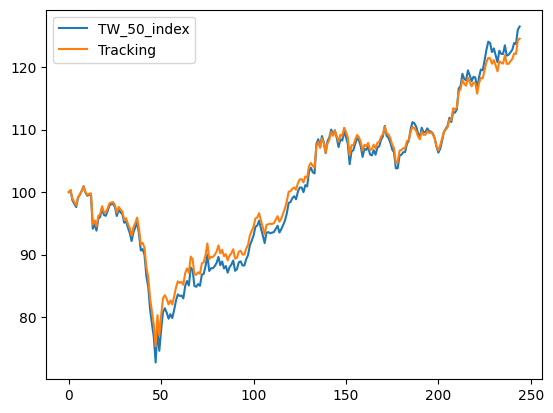

In [292]:
#畫出台50指成長曲線
import matplotlib.pyplot as plt

index50_assets = []
for i in range(len(index50_daily_return)):
    if i == 0:
        index50_assets.append(100)
    else:
        index50_assets.append(index50_assets[i-1] * (1 + list(index50_daily_return['日報酬率 %'])[i]/100))

tracking_assets = []
for i in range(len(tracking_return)):
    if i == 0:
        tracking_assets.append(100)
    else:
        tracking_assets.append(tracking_assets[i-1] * (1 + tracking_return[i]/100))

plt.plot(index50_assets, label='TW_50_index')
plt.plot(tracking_assets, label='Tracking')
plt.legend()

In [293]:
dif = []
for i in range(len(tracking_assets)):
    dif.append(tracking_assets[i] - index50_assets[i])

dif = np.array(dif)
dif.std() * np.sqrt(252)

17.73785619856577